In [1]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv("Downloads\\StressLevelDataset.csv")
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [4]:
print("Missing values before cleaning:")
data.isnull().sum()

Missing values before cleaning:


anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [5]:
# data.drop(columns=['self_esteem','living_conditions','basic_needs',
#                 'academic_performance','social_support'],inplace=True)

In [6]:
data.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [7]:
print(data.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [8]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [9]:

# Verify missing values are handled
print("Missing Values After Handling:\n", data.isnull().sum())


Missing Values After Handling:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [10]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(data.select_dtypes(include=[float, int]))  # Only calculate Z-scores for numeric columns
abs_z_scores = abs(z_scores)

# Define threshold (commonly 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
filtered_data = data[(abs_z_scores < threshold).all(axis=1)]

# Show the result
print(f"Original dataset size: {data.shape}")
print(f"Filtered dataset size: {filtered_data.shape}")


Original dataset size: (1100, 21)
Filtered dataset size: (1100, 21)


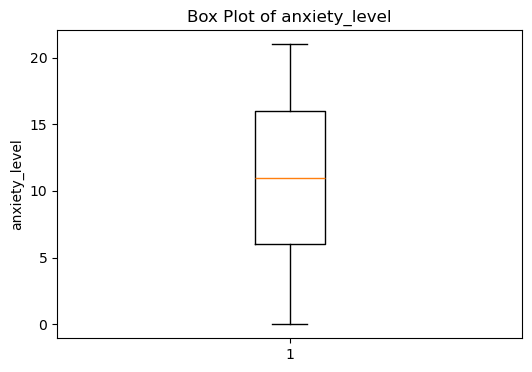

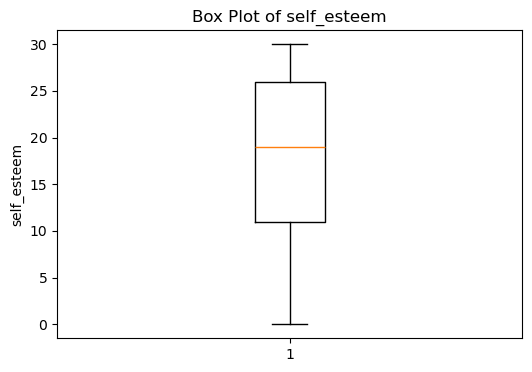

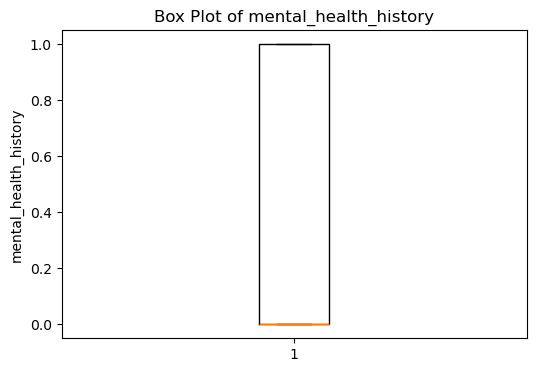

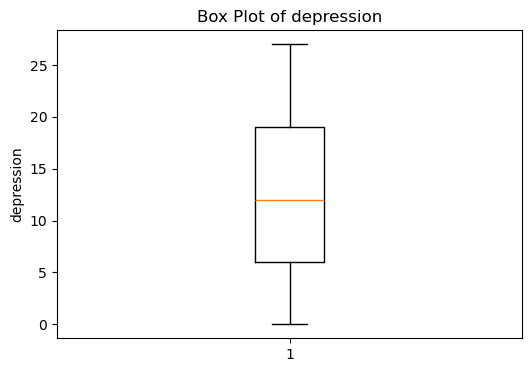

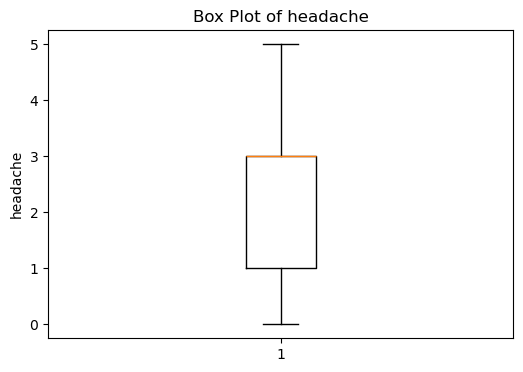

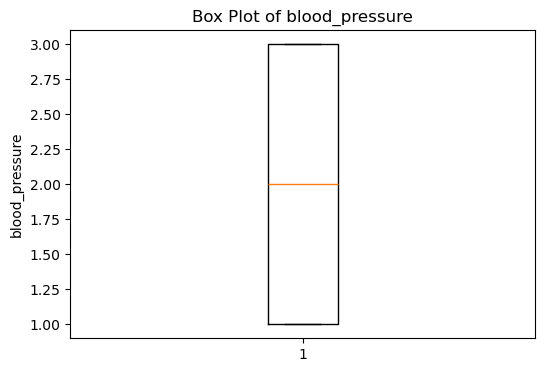

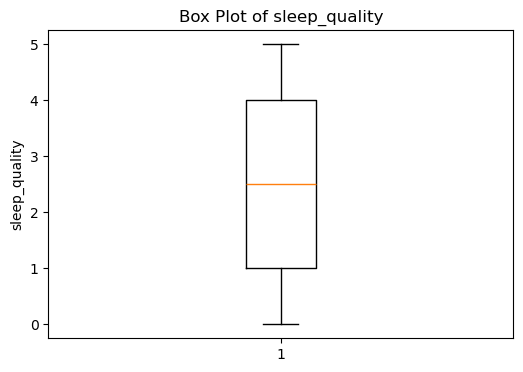

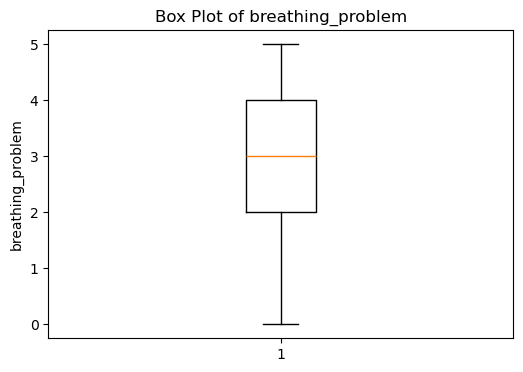

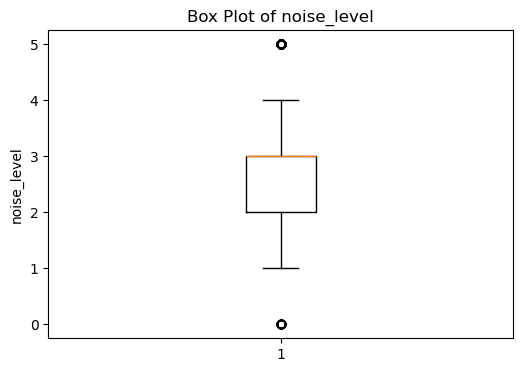

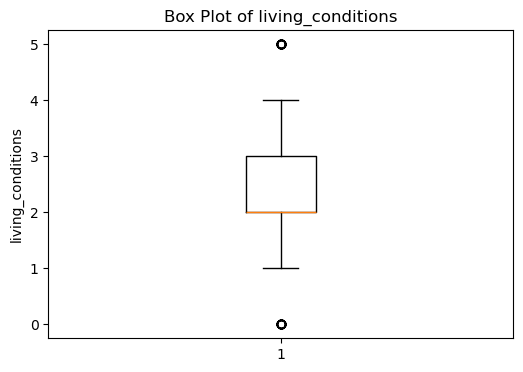

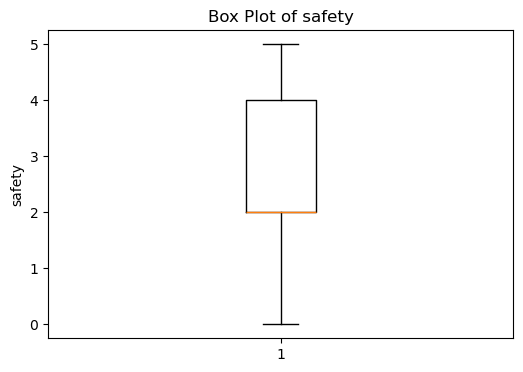

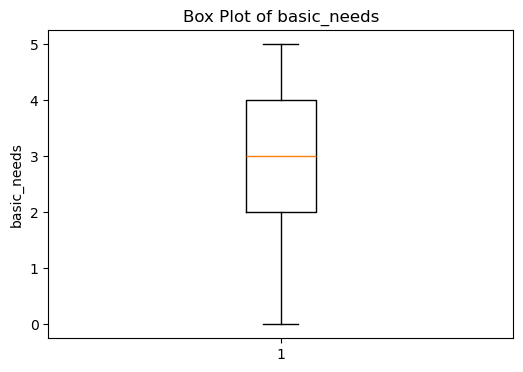

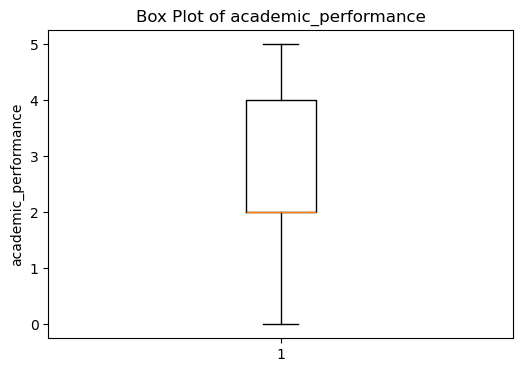

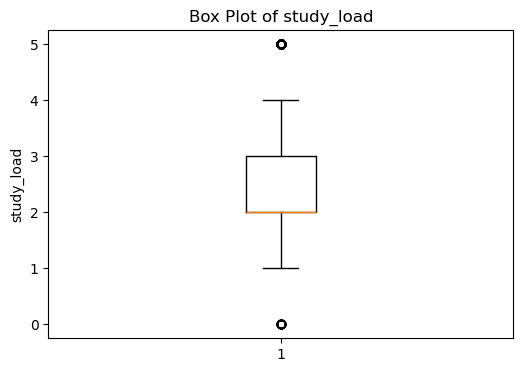

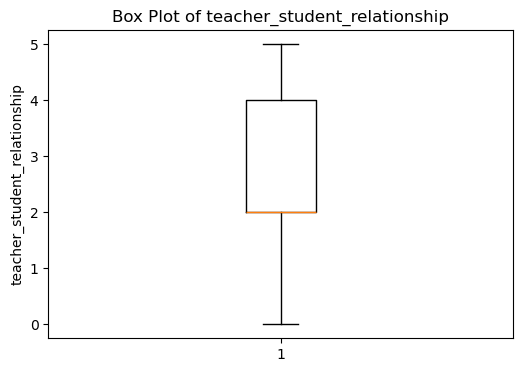

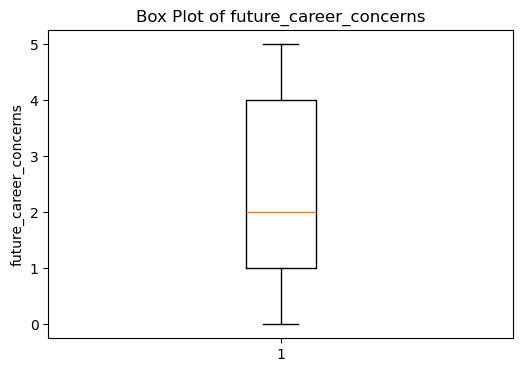

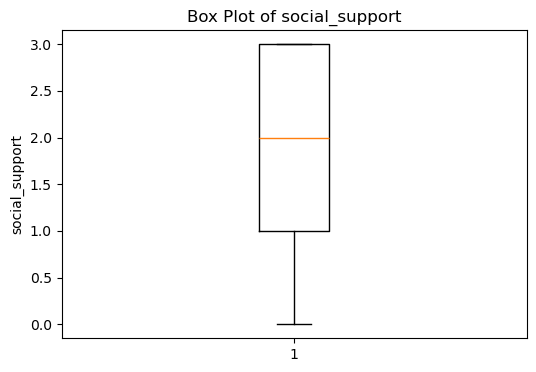

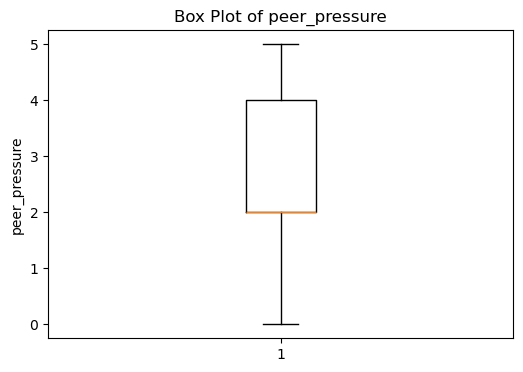

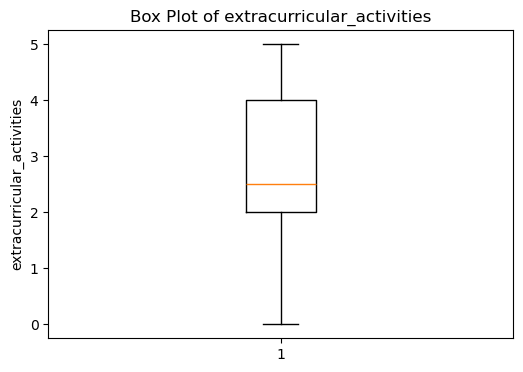

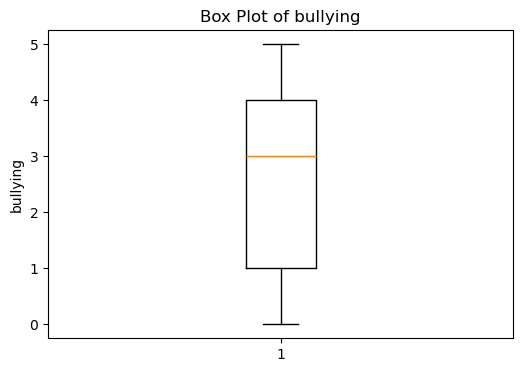

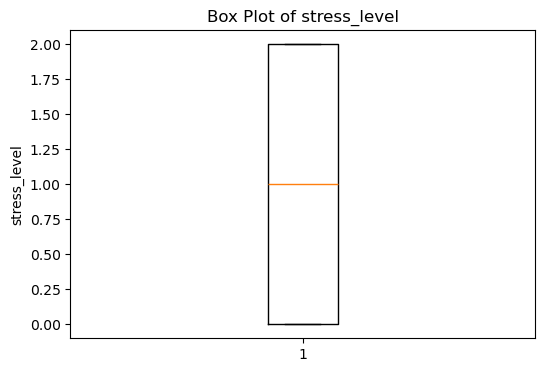

In [44]:
for column in numerical_data:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numerical_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

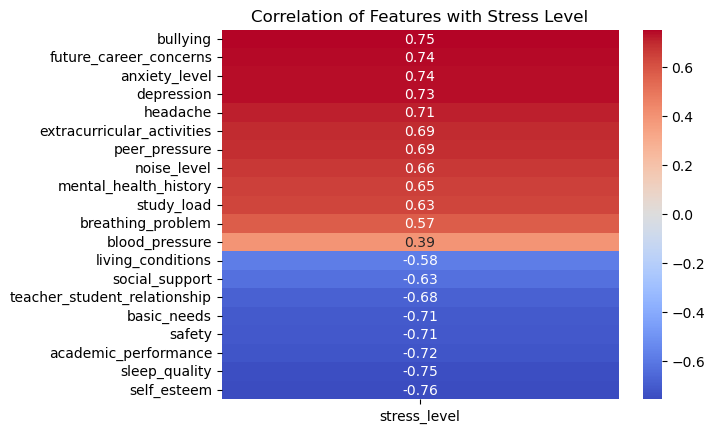

In [12]:
# Correlation heat map only stress level 
correlation = data.corr()
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
correlation_stress = correlation_stress.drop('stress_level')

sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Stress Level')
plt.show()

In [13]:

# Step 3: Separate features and target variable
X = data.drop('stress_level', axis=1)  # Features
y = data['stress_level']  # Target variable

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Ensure accuracy_score is defined
classification_report_output = classification_report(y_test, y_pred)  # Ensure classification_report is defined

# Step 9: Print results
print
print(accuracy)
print("Classification Report:")
print(classification_report_output)

0.8681818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        76
           1       0.89      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



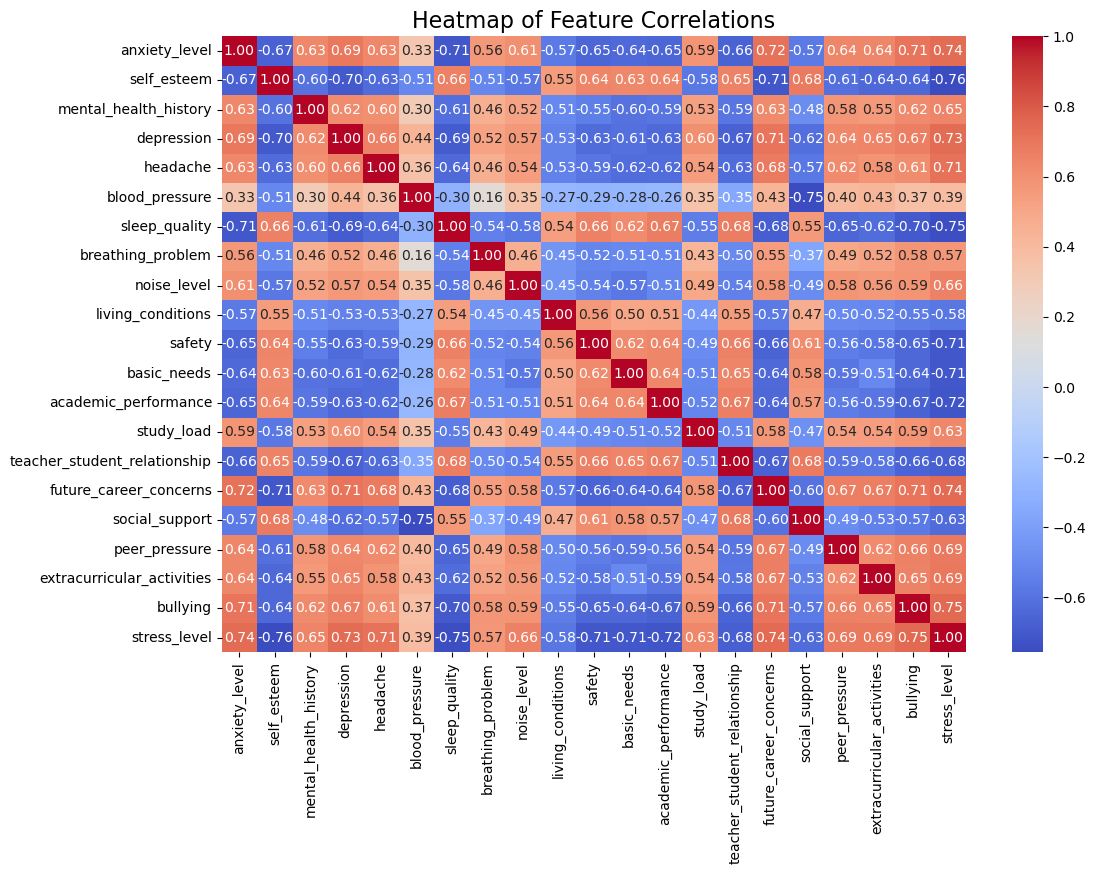

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles
plt.title("Heatmap of Feature Correlations", fontsize=16)
plt.show()


In [15]:
# Try multiple models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")



Random Forest - MSE: 0.13, R²: 0.81
Linear Regression - MSE: 0.14, R²: 0.79
Decision Tree - MSE: 0.29, R²: 0.56


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (k-NN)': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print('-' * 50)

Model: Logistic Regression
Accuracy: 0.8939
Confusion Matrix:
[[ 99   8   6]
 [  8  96   3]
 [  4   6 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       113
           1       0.87      0.90      0.88       107
           2       0.92      0.91      0.91       110

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.8939
Confusion Matrix:
[[101  10   2]
 [  4  99   4]
 [  9   6  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       113
           1       0.86      0.93      0.89       107
           2       0.94      0.86      0.90       110

    accuracy                           0.89       330
   macro avg       0.90      0.89      0